In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Shape detection

Source: https://www.youtube.com/watch?v=mVWQNeY1Pb4

In [30]:
img = cv2.imread("Picture3.png")
imgGrey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Make it greyscale
_,thresh = cv2.threshold(imgGrey,240, 255, cv2.THRESH_BINARY)# Binary threshold
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)# Find contours
for contour in contours:
    #Approximates a polygon curve with a specific precision
    #arcLength calculates a curve's length and whether it is a closed or open contour
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True) 
    cv2.drawContours(img, [approx], 0, (255, 0, 0), 5)
    # Print the name of polygon on the image
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3: # 3 sides in polygon triange 
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0))
    elif len(approx) == 8:
        cv2.putText(img, "Octagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0))
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0))


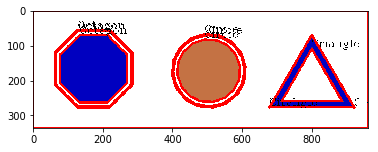

In [31]:
plt.imshow(img)

## Colour detection

Source:https://www.youtube.com/watch?v=3MFGufhCzyo

In [43]:
img2 = cv2.imread("Picture3.png")
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
lower_range = np.array([169,100,100])
upper_range = np.array([189,255,255])
mask = cv2.inRange(hsv, lower_range, upper_range)
cv2.imshow('image', img2)
cv2.imshow('mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()